<a href="https://colab.research.google.com/github/softstat/-/blob/main/seoul_park(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install folium

In [1]:
import folium
from folium import Marker,Icon
import pandas as pd
import csv,time

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dpath = "./drive/MyDrive/hangang/"

In [4]:
df = pd.read_csv(dpath+ "서울특별시_야외 운동기구 현황_20201231.csv",encoding='cp949')
print('='*80)
print('서울특별시 야외 운동기구 현황')
display(df.head(5))

서울특별시 야외 운동기구 현황


,구분,운동기구 수량
0,남산공원(회현),1
1,남산공원(회현),1
2,남산공원(회현),1
3,남산공원(회현),1
4,남산공원(회현),1


In [4]:
import seaborn as sns

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [6]:
plt.rc("font",family="NanumGothic")
mpl.rcParams["axes.unicode_minus"]=False

In [7]:
# 2022년 2월 2일 기준 확진자
corona = pd.read_csv(dpath+"서울특별시 코로나19 자치구별 확진자 발생동향.csv",encoding='cp949')
corona.head(1)

,자치구 기준일,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,광진구 추가,동대문구 전체,동대문구 추가,중랑구 전체,중랑구 추가,성북구 전체,성북구 추가,강북구 전체,강북구 추가,도봉구 전체,도봉구 추가,노원구 전체,노원구 추가,은평구 전체,은평구 추가,서대문구 전체,서대문구 추가,마포구 전체,마포구 추가,양천구 전체,양천구 추가,강서구 전체,강서구 추가,구로구 전체,구로구 추가,금천구 전체,금천구 추가,영등포구 전체,영등포구 추가,동작구 전체,동작구 추가,관악구 전체,관악구 추가,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
0,2022.02.02.00,4811,43,4555,62,6923,129,7453,205,9421,191,11463,98,10522,103,11917,122,8033,121,8273,148,12471,97,11674,105,7893,133,9924,198,10636,221,12936,128,12952,160,7094,135,12780,183,11098,165,14701,283,10970,170,16348,149,17692,389,11815,219,21310,252


In [8]:
small_range=list(range(1,51,2))
subset = corona.iloc[:,small_range]
print(subset.head(1))

   종로구 전체  중구 전체  용산구 전체  성동구 전체  ...  서초구 전체  강남구 전체  송파구 전체  강동구 전체
0    4811   4555    6923    7453  ...   10970   16348   17692   11815

[1 rows x 25 columns]


In [9]:
corona_1 = subset.head(1)
corona_1

,종로구 전체,중구 전체,용산구 전체,성동구 전체,광진구 전체,동대문구 전체,중랑구 전체,성북구 전체,강북구 전체,도봉구 전체,노원구 전체,은평구 전체,서대문구 전체,마포구 전체,양천구 전체,강서구 전체,구로구 전체,금천구 전체,영등포구 전체,동작구 전체,관악구 전체,서초구 전체,강남구 전체,송파구 전체,강동구 전체
0,4811,4555,6923,7453,9421,11463,10522,11917,8033,8273,12471,11674,7893,9924,10636,12936,12952,7094,12780,11098,14701,10970,16348,17692,11815


In [17]:
corona_2.columns=["계"]
corona_2

,계
종로구 전체,4811
중구 전체,4555
용산구 전체,6923
성동구 전체,7453
광진구 전체,9421
동대문구 전체,11463
중랑구 전체,10522
성북구 전체,11917
강북구 전체,8033
도봉구 전체,8273


In [12]:
corona_local = pd.DataFrame({'자치구':['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구',
                                    '마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구'],
                             '계':[4811,4555,6923,7453,9421,11463,10522,11917,8033,8273,12471,11674,7893,9924,10636,12936,12952,7094,12780,11098,14701,10970,16347,17692,11815]})
corona_local

,자치구,계
0,종로구,4811
1,중구,4555
2,용산구,6923
3,성동구,7453
4,광진구,9421
5,동대문구,11463
6,중랑구,10522
7,성북구,11917
8,강북구,8033
9,도봉구,8273


In [13]:
final = corona_local.set_index("자치구")
final.head()

,계
자치구,
종로구,4811
중구,4555
용산구,6923
성동구,7453
광진구,9421


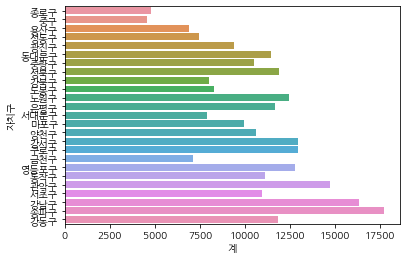

In [14]:
sns.barplot(x="계",y=final.index,data=final);

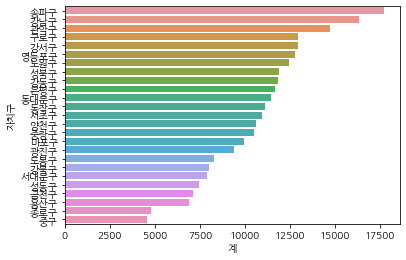

In [15]:
# 확진자 수가 가장 많은 구부터 차례로 확인
final.sort_values("계",ascending=False,inplace=True)
final.head()
sns.barplot(x="계",y=final.index,data=final);

In [29]:
# 1인당 녹지 비율과 상관이 있는지 확인
# txt 파일 불러오려고 했으나 한 열에 제목이 겹침
# 별수 없이 직접 텍스트 작성
# 1인당 공원면적이 있고 1인당 도보생활권공원면적 관련 데이터가 있음. 

green = pd.DataFrame({'자치구':['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구',
                                    '마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구'],
                       '1인당 공원면적(m^2)':[71.72,23.5,7.26,10.23,9.58,3.42,12.49,19.03,46.3,31.04,27.97,29.68,15.74,11.96,6.66,7.7,8.42,11.19,7.39,
                       10.78,24.38,35.13,14.28,7.08,7.25],
                      '1인당 도보생활권공원면적(m^2)':[19.02,9.99,6.59,9.64,3.75,2.94,4.18,3.67,6.28,3.42,3.57,4.55,3.48,11.36,4.82,6.01,3.55,2.27,7.26,
                        5.76,3.75,5.01,6.67,6.47,4.53]
                      })
green



,자치구,1인당 공원면적(m^2),1인당 도보생활권공원면적(m^2)
0,종로구,71.72,19.02
1,중구,23.50,9.99
2,용산구,7.26,6.59
3,성동구,10.23,9.64
4,광진구,9.58,3.75
5,동대문구,3.42,2.94
6,중랑구,12.49,4.18
7,성북구,19.03,3.67
8,강북구,46.30,6.28
9,도봉구,31.04,3.42


In [30]:
# 데이터 합치기
rate = pd.merge(final,green,left_on="자치구",right_on="자치구")
rate.head()

,자치구,계,1인당 공원면적(m^2),1인당 도보생활권공원면적(m^2)
0,송파구,17692,7.08,6.47
1,강남구,16347,14.28,6.67
2,관악구,14701,24.38,3.75
3,구로구,12952,8.42,3.55
4,강서구,12936,7.70,6.01


**참고자료 보는법**

 [https://www.nature.com/articles/s41893-021-00781-9](https://) 


> 자연적 요소의 불평등이 코로나 감염에 영향을 준다.

(주변 공원과 같은 자연친화적 요소가 많다면 코로나 감염의 위험성 감소)


---


 
 출처: 네이처


**코로나 확진자 수와 1인당 공원면적을 비교하여 음의 상관관계를 갖는다면 논문의 적용이 국내에서도 통한다라는 것 증명**

그렇지 않다면 자료의 누락이나 다른 요소가 있으리라 판단

In [31]:
# 코로나 확진자 수와 공원 사이의 상관관계 파악
rate[["계","1인당 공원면적(m^2)","1인당 도보생활권공원면적(m^2)"]].corr(method="spearman")

,계,1인당 공원면적(m^2),1인당 도보생활권공원면적(m^2)
계,1.000000,-0.263077,-0.153106
1인당 공원면적(m^2),-0.263077,1.000000,0.039238
1인당 도보생활권공원면적(m^2),-0.153106,0.039238,1.000000


음의 상관관계가 나왔지만 크기가 크지않아 정확한 추정은 불가능하다고 판단 

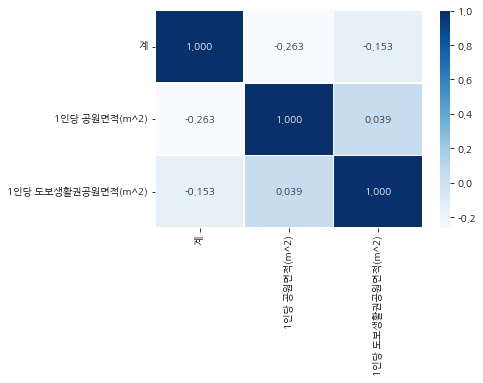

In [32]:
sns.heatmap(rate[["계","1인당 공원면적(m^2)","1인당 도보생활권공원면적(m^2)"]].corr(method="spearman"),annot=True,fmt=".3f", linewidth=.5,cmap="Blues");

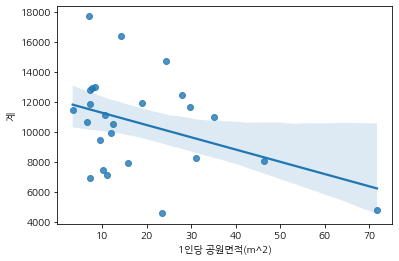

In [34]:
sns.regplot(x="1인당 공원면적(m^2)",y="계",data=rate,ci=90);

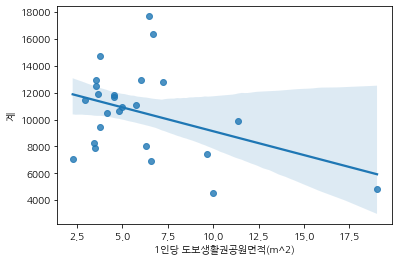

In [35]:
sns.regplot(x="1인당 도보생활권공원면적(m^2)",y="계",data=rate,ci=90);

**한계점:** 1인당 공원면적과 1인당 도보생활권공원면적의 지표들이 고르게 분포되어 있지 못하고 한쪽에 쏠려있어 정확한 추정은 불가  